# Regressão linear(teoria)



##  Covariância, coeficiente de correlação e determinação

**usamos para medir a relaçõa matematica entre duas variaveis**

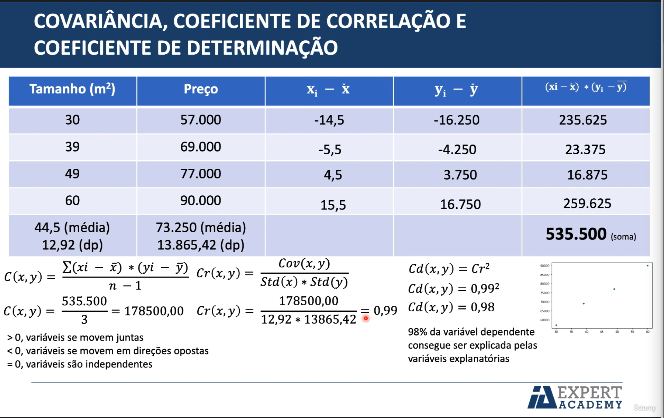



```
01. Covariancia: determina a correlação entre variaveis, nao é muito bom quando temos escalas muito distintas

    -> > 0, proporcionais
    -> <0, inversamente proporcionais
    -> =0, variaveis são independentes

02. Coeficiente de correlação -> usaremos a covariancia juntamente com o desvio padrao das variaveis, para  escala nao afetar tanto

    -> = 1 ou proximo: variabilidade de uma variavel é explicada pela outra
    -> =0: nao existe ligação entre as variaveis
    -> <0: correlção negativa

03. Coeficiente de determinação: Coeficiente de correlação elevado ao quadrado

- resultado = X significa que X% da variavel dependente consegue ser explicada pelas variaveis explanatorias
```



OBS: correlação NÃO é causa!!!!!

## Teoria regressão linear

- queremos fazer previsões de numeros

- a partir de variaveis explanatorias X, queremos prever uma variavel dependente Y

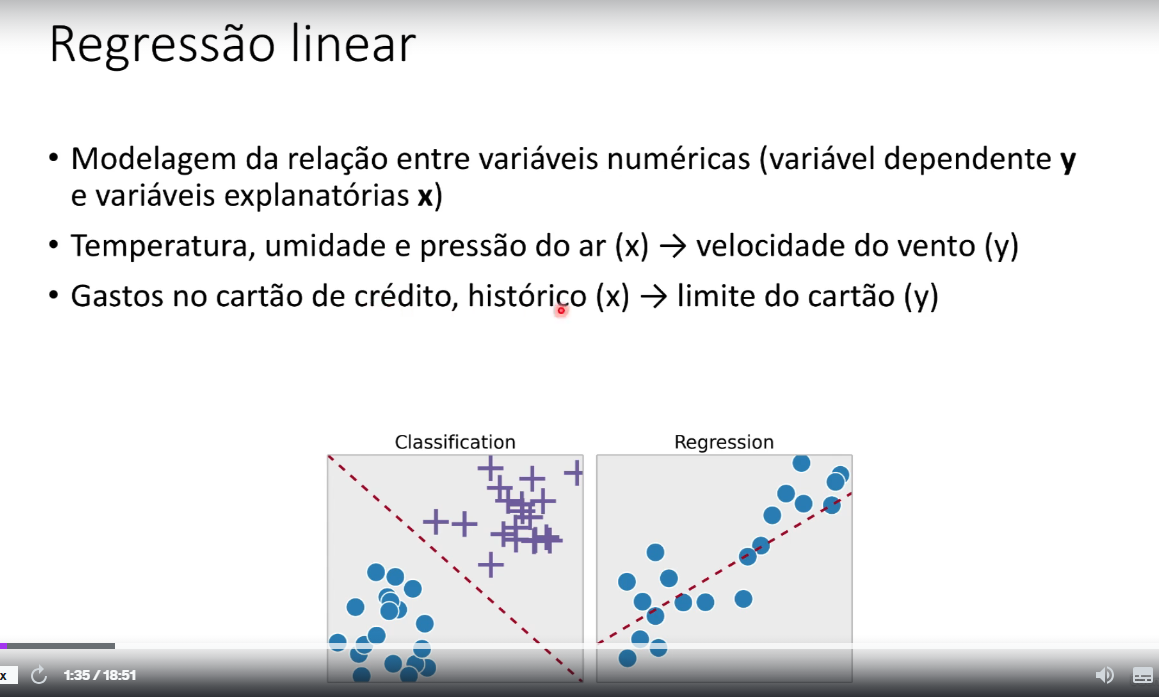

- Queremos fazer uma especie de função, onde temos coeficientes e constantes, o objetivo do algoritmo é achar os melhores valores para eles
- ex:

```
y = B0 + (B1 * X1) + (B2 * X2) + (X3 * B4), ..., (XN * BM)
o algoritmo deve pegar os melhores valores para B0, B1, B2, B3, ...
```



ajuste dos parametros (B0, B1, ..., Bn)



```
01. Design matrix(algebra linear)
    - bases de dados com poucos atributos
    - inversao de matrizes que tem um custo computacional alto

02. Gradient Descent
    - Desempenho melhor com muitos atributos
    - queremos achar o minimo global do grafico de erro X B(erro baseado nos parametros)
    - Usamos derivadas parciais
```



## Metricas de erro

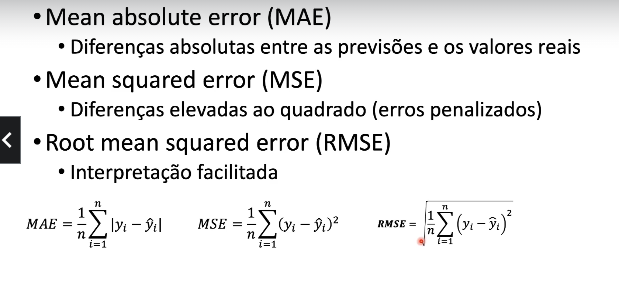

# Regressão linar Simples

```
SCORE: 0.488
MAE: 172604.12
```

## Base plano saude

In [ ]:
!pip install plotly --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.5/15.5 MB 36.7 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.13.1
    Uninstalling plotly-5.13.1:
      Successfully uninstalled plotly-5.13.1


In [ ]:
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
base_plano_saude = pd.read_csv('/content/drive/MyDrive/Machine Learning e Data Science com Python de A a Z/Bases de dados/plano_saude.csv')

In [ ]:
base_plano_saude

,idade,custo
0,18,871
1,23,1132
2,28,1242
3,33,1356
4,38,1488
5,43,1638
6,48,2130
7,53,2454
8,58,3066
9,63,4090


Vamos prever o custo com base na idade

In [ ]:
X_plano_saude = base_plano_saude.iloc[:, 0].values
X_plano_saude = X_plano_saude.reshape(-1, 1)
X_plano_saude

array([[18],
       [23],
       [28],
       [33],
       [38],
       [43],
       [48],
       [53],
       [58],
       [63]])

In [ ]:
#X_plano_saude = base_plano_saude.['idade'].values

In [ ]:
y_plano_saude = base_plano_saude.iloc[:, 1].values
y_plano_saude

array([ 871, 1132, 1242, 1356, 1488, 1638, 2130, 2454, 3066, 4090])

In [ ]:
# Vendo a correlação dos dois
np.corrcoef(X_plano_saude, y_plano_saude)

array([[1.        , 0.93091958],
       [0.93091958, 1.        ]])

93% do custo de saude pode ser explicado pela idade da pessoa

In [ ]:
from sklearn.linear_model import LinearRegression
regressor_plano_saude = LinearRegression()
regressor_plano_saude.fit(X_plano_saude, y_plano_saude)

LinearRegression()

In [ ]:
# B0
regressor_plano_saude.intercept_

-558.9490909090912

In [ ]:
# Parametro b1
regressor_plano_saude.coef_

array([61.86787879])

In [ ]:
previsoes = regressor_plano_saude.predict(X_plano_saude)
previsoes

array([ 554.67272727,  864.01212121, 1173.35151515, 1482.69090909,
       1792.03030303, 2101.36969697, 2410.70909091, 2720.04848485,
       3029.38787879, 3338.72727273])

In [ ]:
# grafico para

grafico = px.scatter(x = X_plano_saude.ravel(), y = y_plano_saude)
grafico.add_scatter(x = X_plano_saude.ravel(), y = previsoes, name = 'regressao')
grafico.show()

In [ ]:
regressor_plano_saude.score(X_plano_saude, y_plano_saude)

0.8666112727879174

In [ ]:
!pip install --upgrade yellowbrick

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from yellowbrick.regressor import ResidualsPlot

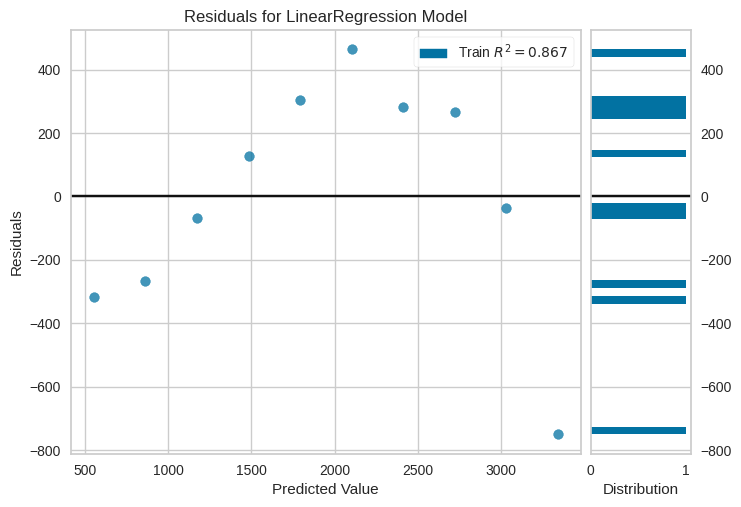

<Axes: title={'center': 'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [ ]:
visualizador = ResidualsPlot(regressor_plano_saude)
visualizador.fit(X_plano_saude, y_plano_saude)
visualizador.poof()
# Mostra o qual distante do valor real estao os valores preditos

## Base preço casas

In [ ]:
base_casas = pd.read_csv('/content/drive/MyDrive/Machine Learning e Data Science com Python de A a Z/Bases de dados/house_prices.csv')
base_casas.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
base_casas.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [ ]:
base_casas.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

<ipython-input-38-3404775601fc>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

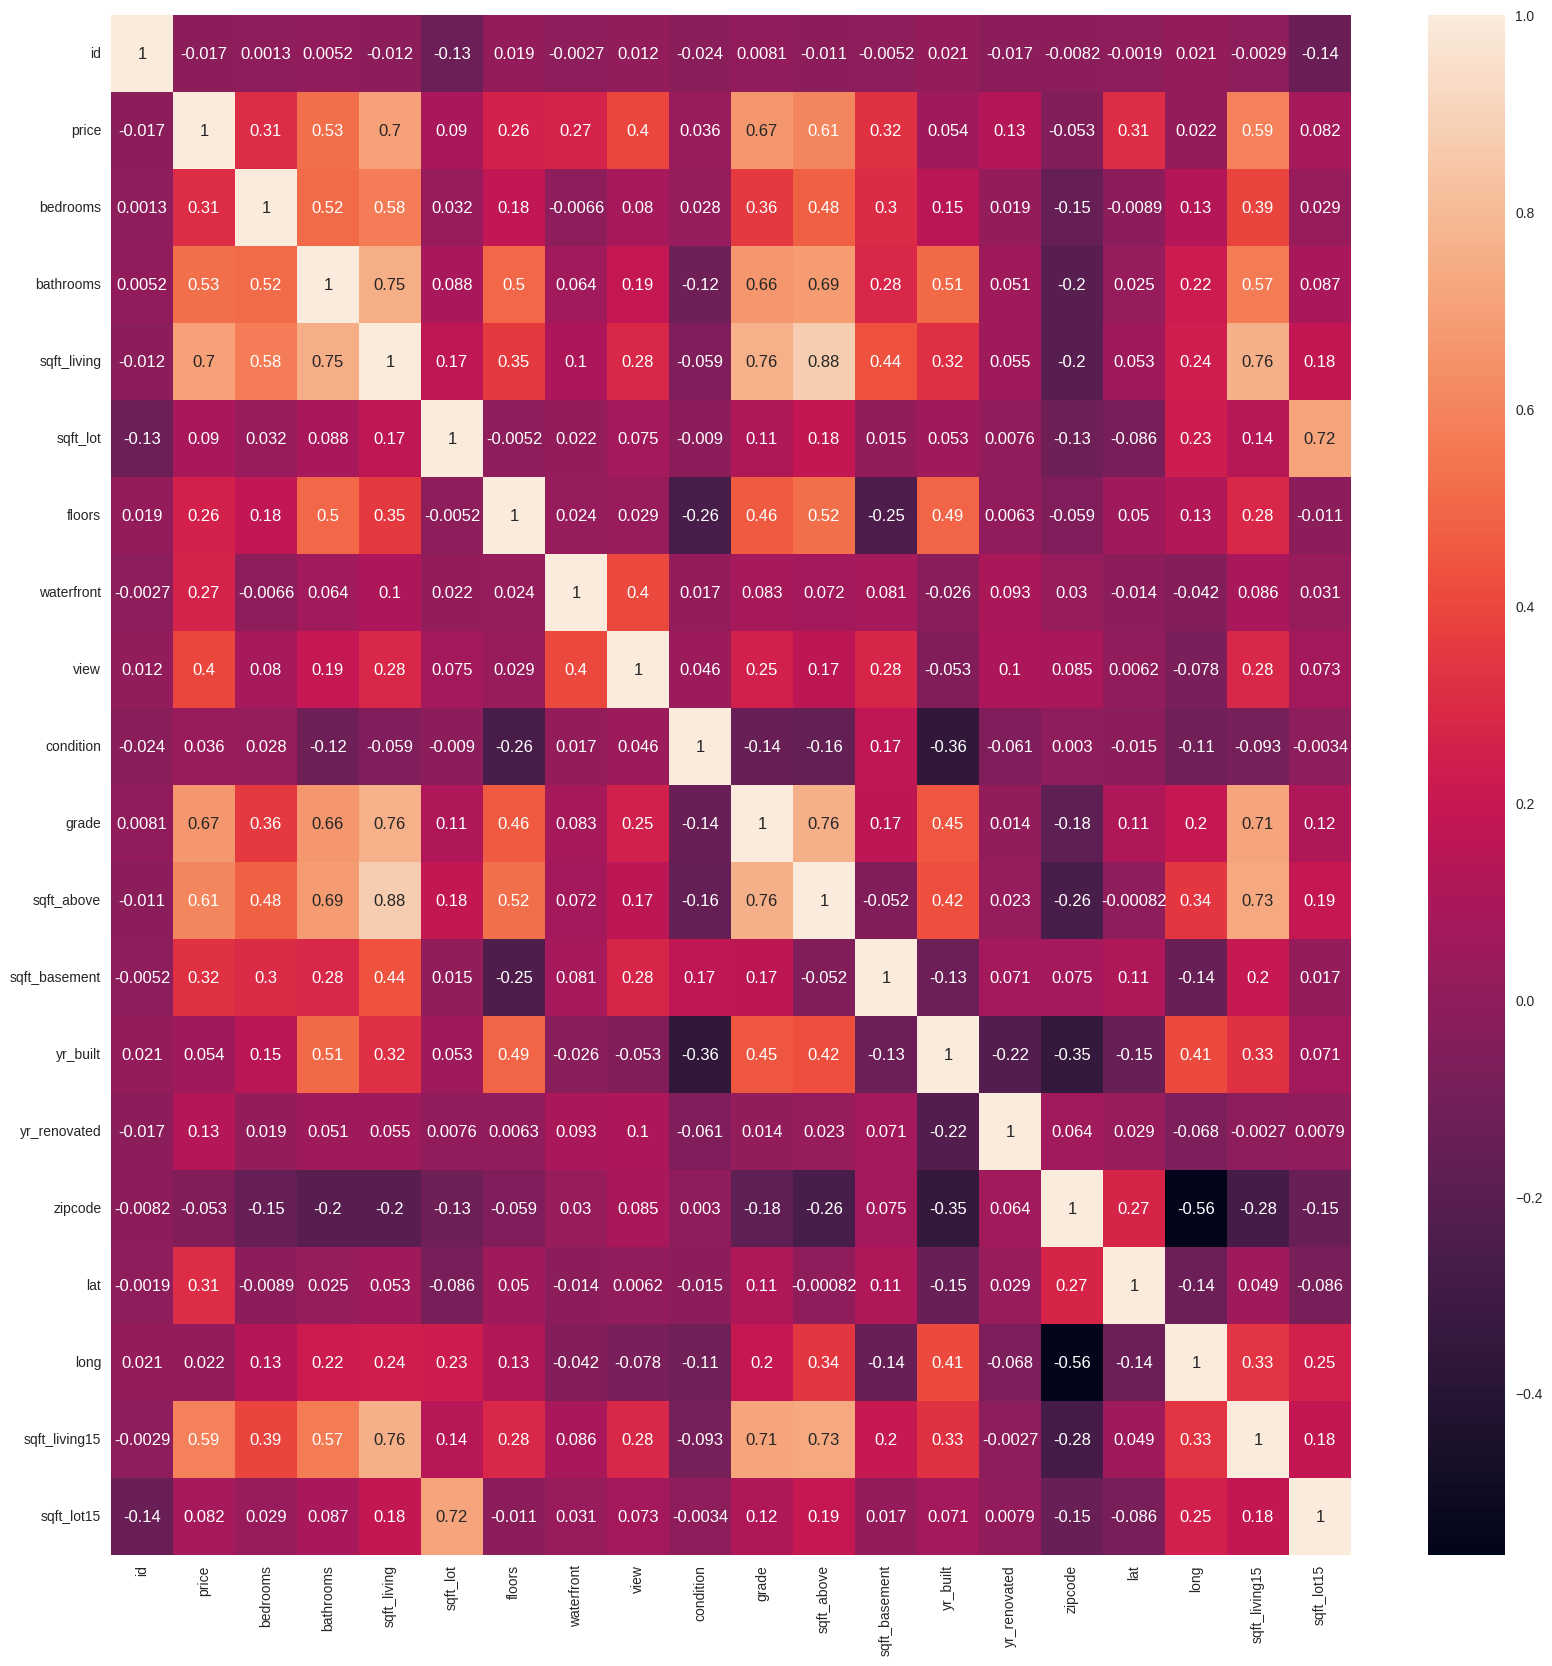

In [ ]:
figura = plt.figure(figsize = (20,20))
sns.heatmap(base_casas.corr(), annot=True)

In [ ]:
# Primeiro vamos fazer a regrerção com o parametro X sendo apenas o metro quadrado - sqft_living
X_casas = base_casas.iloc[:, 5].values
X_casas = X_casas.reshape(-1, 1)
X_casas

array([[1180],
       [2570],
       [ 770],
       ...,
       [1020],
       [1600],
       [1020]])

In [ ]:
y_casas = base_casas.iloc[:, 2].values
y_casas

array([221900., 538000., 180000., ..., 402101., 400000., 325000.])

In [ ]:
from sklearn.model_selection import train_test_split
X_casas_train, X_casas_test, y_casas_train, y_casas_test = train_test_split(X_casas, y_casas, test_size=0.3, random_state=0)

In [ ]:
X_casas_train.shape, X_casas_test.shape


((15129, 1), (6484, 1))

In [ ]:
y_casas_train.shape, y_casas_test.shape

((15129,), (6484,))

In [ ]:
# Regressao simples -> 1 atributo apenas
regressor_simples_casas = LinearRegression()
regressor_simples_casas.fit(X_casas_train,y_casas_train )

LinearRegression()

In [ ]:
#b0
regressor_simples_casas.intercept_

-37893.59850106726

In [ ]:
#b1
regressor_simples_casas.coef_

array([278.32860644])

In [ ]:
regressor_simples_casas.score(X_casas_train, y_casas_train)

0.49453356717789776

In [ ]:
regressor_simples_casas.score(X_casas_test, y_casas_test)

0.48889929019453027

In [ ]:
previsoes = regressor_simples_casas.predict(X_casas_train)


In [ ]:
# Grafico para previsoes referentes a base de dados de treinamento
grafico_1 = px.scatter(x = X_casas_train.ravel(), y = y_casas_train)
grafico_2 = px.line(x = X_casas_train.ravel(), y = previsoes)
grafico_2.data[0].line.color = 'red'
grafico_3 = go.Figure(data = grafico_1.data + grafico_2.data)
grafico_3.show()

In [ ]:
previsoes_teste = regressor_simples_casas.predict(X_casas_test)
previsoes_teste

array([ 360116.30871034, 1261900.99358095,  362899.59477476, ...,
        560512.90534826,  374032.73903242,  329500.16200177])

In [ ]:
y_casas_test

array([ 297000., 1578000.,  562100., ...,  380000.,  268000.,  206000.])

In [ ]:
abs(y_casas_test - previsoes_teste).mean() # Erro medio absoluto

172604.1288999542

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mean_absolute_error(y_casas_test, previsoes_teste)

172604.1288999542

In [ ]:
mean_squared_error(y_casas_test, previsoes_teste)

70170013932.1159

In [ ]:
# root mean squared error
np.sqrt(mean_squared_error(y_casas_test, previsoes_teste))

264896.23238565685

In [ ]:
# Grafico para previsoes referentes a base de dados de teste
grafico_1 = px.scatter(x = X_casas_test.ravel(), y = y_casas_test)
grafico_2 = px.line(x = X_casas_test.ravel(), y = previsoes_teste)
grafico_2.data[0].line.color = 'red'
grafico_3 = go.Figure(data = grafico_1.data + grafico_2.data)
grafico_3.show()

# Regressão linear multipla


```
SCORE: 0.688
MAE: 42760757001.53

```


Agora vamos trabalhar com outros atributios

In [ ]:
base_casas.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
# selecionando as variaveis para fazer a previsao
X_casas = base_casas.iloc[:, 3:19].values
X_casas

array([[ 3.00000e+00,  1.00000e+00,  1.18000e+03, ...,  9.81780e+04,
         4.75112e+01, -1.22257e+02],
       [ 3.00000e+00,  2.25000e+00,  2.57000e+03, ...,  9.81250e+04,
         4.77210e+01, -1.22319e+02],
       [ 2.00000e+00,  1.00000e+00,  7.70000e+02, ...,  9.80280e+04,
         4.77379e+01, -1.22233e+02],
       ...,
       [ 2.00000e+00,  7.50000e-01,  1.02000e+03, ...,  9.81440e+04,
         4.75944e+01, -1.22299e+02],
       [ 3.00000e+00,  2.50000e+00,  1.60000e+03, ...,  9.80270e+04,
         4.75345e+01, -1.22069e+02],
       [ 2.00000e+00,  7.50000e-01,  1.02000e+03, ...,  9.81440e+04,
         4.75941e+01, -1.22299e+02]])

In [ ]:
y_casas = base_casas.iloc[:, 2].values
y_casas

array([221900., 538000., 180000., ..., 402101., 400000., 325000.])

In [ ]:
from sklearn.model_selection import train_test_split
X_casas_train, X_casas_test, y_casas_train, y_casas_test = train_test_split(X_casas, y_casas, test_size=0.3, random_state=0)

In [ ]:
X_casas_train.shape, X_casas_test.shape

((15129, 16), (6484, 16))

In [ ]:
regressor_multiplo_casas = LinearRegression()
regressor_multiplo_casas.fit(X_casas_train, y_casas_train)

LinearRegression()

In [ ]:
regressor_multiplo_casas.intercept_

5736222.703396254

In [ ]:
regressor_multiplo_casas.coef_ # Agora teremos varios coeficientes b1, ..., bn

array([-3.08423090e+04,  3.66540816e+04,  1.12179159e+02,  8.00604120e-03,
        9.60355724e+03,  5.85441638e+05,  5.60621840e+04,  2.54795004e+04,
        1.01092121e+05,  6.96565321e+01,  4.25226266e+01, -2.60724691e+03,
        1.40070753e+01, -5.53557431e+02,  6.11778251e+05, -1.95564688e+05])

In [ ]:
regressor_multiplo_casas.score(X_casas_train, y_casas_train) # Score base treinamento

0.7029888085955005

In [ ]:
regressor_multiplo_casas.score(X_casas_test, y_casas_test) # Score base test

0.6885414149062573

In [ ]:
previsoes = regressor_multiplo_casas.predict(X_casas_test)
previsoes

array([ 383751.77768694, 1514216.17517461,  546921.96179107, ...,
        314968.57623309,  219405.55573553,  148128.8346704 ])

In [ ]:
y_casas_test

array([ 297000., 1578000.,  562100., ...,  380000.,  268000.,  206000.])

In [ ]:
# Calculando a taxa de erro
from sklearn.metrics import mean_absolute_error, mean_squared_error
mean_absolute_error(y_casas_test, previsoes)

123888.44377485834

In [ ]:
mean_squared_error(y_casas_test, previsoes)

42760757001.53751